# Prueba Intertrimestral

**Nombre: Yago** 

**Apellidos: Tobio Souto**

**Tiempo de la prueba: 2 Horas**

**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos

**Fecha:** 18 de octubre de 2023

**Instrucciones:**

- Escribe código limpio y autoexplicativo.

- Se eliminará 0.5 puntos por usar Seaborn o Matplotlib.

- Se pueden utilizar los materiales de clase.

- Se puede utilizar internet para búsqueda de dudas y documentación.

- No se puede utilizar ningún tipo de LLM.

- No se puede utilizar mensajería instantánea.

- Sube tus resultados a tu repositorio de Github.

- Imprime una versión en PDF en A3 y Portrait del notebook.

- Envialo tus resultados a dmartincorral@icai.comillas.edu adjuntando el PDF y la url del notebook subido al repositorio de Github.


## Inicialización de librerías

Carga aquí todas las librerías que vayas a utilizar.

In [5]:
import pandas as pd

## Ejercicio 1 (2 puntos):

a) Crea una función que calcule y devuelva el factorial de un número entero. **(0.6 puntos)**

b) Crea una función que verifique si un número es primo o no. **(0.6 puntos)**

c) Muestra en un dataframe los 50 primeros números positivos, si es primo y su factorial utilizando las funciones anteriores. **(0.6 puntos)**

d) ¿Cómo se podría programar en una clase las tres operaciones anteriores? **(0.2 puntos)**

In [24]:
# a 
# Python program to find the factorial of a number provided by the user.
def factorial(num):
    factorial = 1
    # Verificacion si el numero es negativo
    if num < 0:
        print("Lo siento, no se puede hacer el factorial para numeros negativos")
    elif num == 0:
        print("El factorial de 0 es 1")
    else:
        for i in range(1,num + 1):
            factorial = factorial*i
        return factorial

# b 
def isprime(num):
    isprime = 0
    if num == 1:
        isprime = 0
    elif num > 1:
    # Verificar factores
        for i in range(2,num):
            if (num % i) == 0:
                isprime = 0
                break
        else:
            isprime = 1
        # Si el numero de entrada es menos
        # o igual a uno no es primo
    else:
        isprime = 0
    
    return isprime

# c 
# Crea un dataframe de pandas
def num_fact_prime_table():
    df = pd.DataFrame(columns=['number', 'factorial', 'prime'])

    for i in range(1,51): #Rellenamos con los numeros positivos (Se interpreta esto de 0 -> 50)
        df.loc[-1] = [i,factorial(i), isprime(i)]
        df.index = df.index + 1  
    df.head()
    return df

#### D Hacerlo una clase: 

class Operaciones_Numero:
    def __init__(self, num) -> None:
        self.num = num

    def factorial(self):
        return factorial(self.num)
    
    def is_prime(self):
        return isprime(self.num)
    
    def show_table(self):
        return num_fact_prime_table()
    
test = Operaciones_Numero(4)
print(test.factorial())
print(test.is_prime())
#test.show_table() -> Ocultado por extensa tabla

24
0


## Ejercicio 2 (4 puntos):

a) Extrae de sklearn el conjunto de datos __California Housing dataset__
 y transfórmalo a dataframe de pandas **(0.25 puntos)**

b) Construye una función que muestra la estructura del dataset, el número de NAs, tipos de variables y estadísticas básicas de cada una de las variables. **(0.5 puntos)**

c) Construye una __Regresión lineal__ y un __Random forest__ que predigan el __Median house value__ según los datos disponibles. **(0.75 puntos)**

d) Visualiza cuales son las variables (coeficientes) más importantes en cada uno de los modelos. **(1.25 puntos)**

e) Decide a través de las métricas que consideres oportunas, cuál de los dos modelos es mejor, por qué y explica el proceso que has realizado para responder en los puntos anteriores. **(1.25 puntos)**

In [92]:
import pandas as pd 
df_housing = pd.read_csv('California Housing.csv')
df_housing.dropna()
#b - Construye una funcion que: 
# - Estructura
# - Tipos de variables 
# - Estadisticas basicas

def basic_df_info(df):
    print("\nDF BASIC STRUCTURE AND VARIABLE TYPES:")
    print(df.info())
    print("\nDF Description and stats")
    print(df.describe)
    print("\nDF Column Data Types")
    print(df.dtypes)
    print("\n DF NA COUNT")
    print(df.isna().sum())

basic_df_info(df_housing)


DF BASIC STRUCTURE AND VARIABLE TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20640 non-null  int64  
 1   MedInc      20640 non-null  float64
 2   HouseAge    20640 non-null  float64
 3   AveRooms    20640 non-null  float64
 4   AveBedrms   20640 non-null  float64
 5   Population  20640 non-null  float64
 6   AveOccup    20640 non-null  float64
 7   Latitude    20640 non-null  float64
 8   Longitude   20640 non-null  float64
 9   target      20640 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.6 MB
None

DF Description and stats
<bound method NDFrame.describe of        Unnamed: 0  MedInc  HouseAge  AveRooms  AveBedrms  Population  \
0               0  8.3252      41.0  6.984127   1.023810       322.0   
1               1  8.3014      21.0  6.238137   0.971880      2401.0   
2               2  7.2574   

In [93]:
#c - Construye una regresión lineal y un Random Forest que predigan el Median House Value 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_housing.loc[:, df_housing.columns != 'target']
y = df_housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
target_prediction = model.predict(X_test)

In [120]:
# Evaluation 
score = model.score(X_test, y_test)
print(f"Model R-squared score: {score}")

pred = model.predict(X_test)

Model R-squared score: 0.5767056593356363


In [95]:
from sklearn.metrics import mean_squared_error, r2_score
# Visualizacion de los coeficientes importantes 
print("Coeficientes: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, pred))

Coeficientes: 
 [ 6.23441466e-06  4.49940956e-01  1.04042173e-02 -1.26215749e-01
  7.96773405e-01 -7.42700597e-07 -3.58141172e-03 -4.13729942e-01
 -4.25546265e-01]
Mean squared error: 0.55
Coefficient of determination: 0.58


#### Random Forest

In [121]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

## Ejercicio 3 (4 puntos):


*Consideremos* el dataset que contiene __The Most Streamed Spotify Songs 2023__ que se encuentra en el respositorio.

Información de las variables:

- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- vartist_count: Number of artists contributing to the song
- released_year: Year when the song was released
- released_month: Month when the song was released
- release_day: Day of the month when the song was released
- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts
- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song

Para las respuestas b, c, d, e, f y g es imperativo acompañarlas respuestas con una visualización.

a) Lee el fichero en formato dataframe, aplica la función del ejercicio 2.b, elimina NAs y convierte a integer si fuera necesario. **(0.25 puntos)**

b) ¿Cuántos artistas únicos hay? **(0.25 puntos)**

c) ¿Cuál es la distribución de reproducciones? **(0.5 puntos)**

d) ¿Existe una diferencia signitificativa en las reproducciones entre las canciones de un solo artista y las de más de uno? **(0.5 puntos)**

e) ¿Cuáles son las propiedades de una canción que mejor correlan con el número de reproducciones de una canción? **(0.5 puntos)**

f) ¿Cuáles son las variables que mejor predicen las canciones que están por encima el percentil 50? **(1 puntos)**

*Nota: Crea una variable binaria (Hit/No Hit) en base a 3.c, crea una regresión logística y visualiza sus coeficientes.*

g) Agrupa los 4 gráficos realizados en uno solo y haz una recomendación a un sello discográfico para producir un nuevo hit. **(1 puntos)**


In [116]:
import pandas as pd 
df_spotify = pd.read_csv('Spotify 2023.csv', encoding='ISO-8859-1')
df_spotify.shape
df_spotify.describe
df_spotify.info()
print(df_spotify.head())

# Obtenemos información basica:
basic_df_info(df_spotify)

#Eliminamos NA's
df_spotify.dropna()

#Sustituimos a numericos 
df_spotify = pd.to_numeric(df_spotify["in_deezer_playlists"], errors='coerce')
#df_spotify = pd.to_numeric(df_spotify["in_shazam_charts"], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    ob

In [100]:
# Numero de artistas unicos
print((df_spotify['artist(s)_name'].nunique()))

644


### Distribución de las reproducciones

<Axes: >

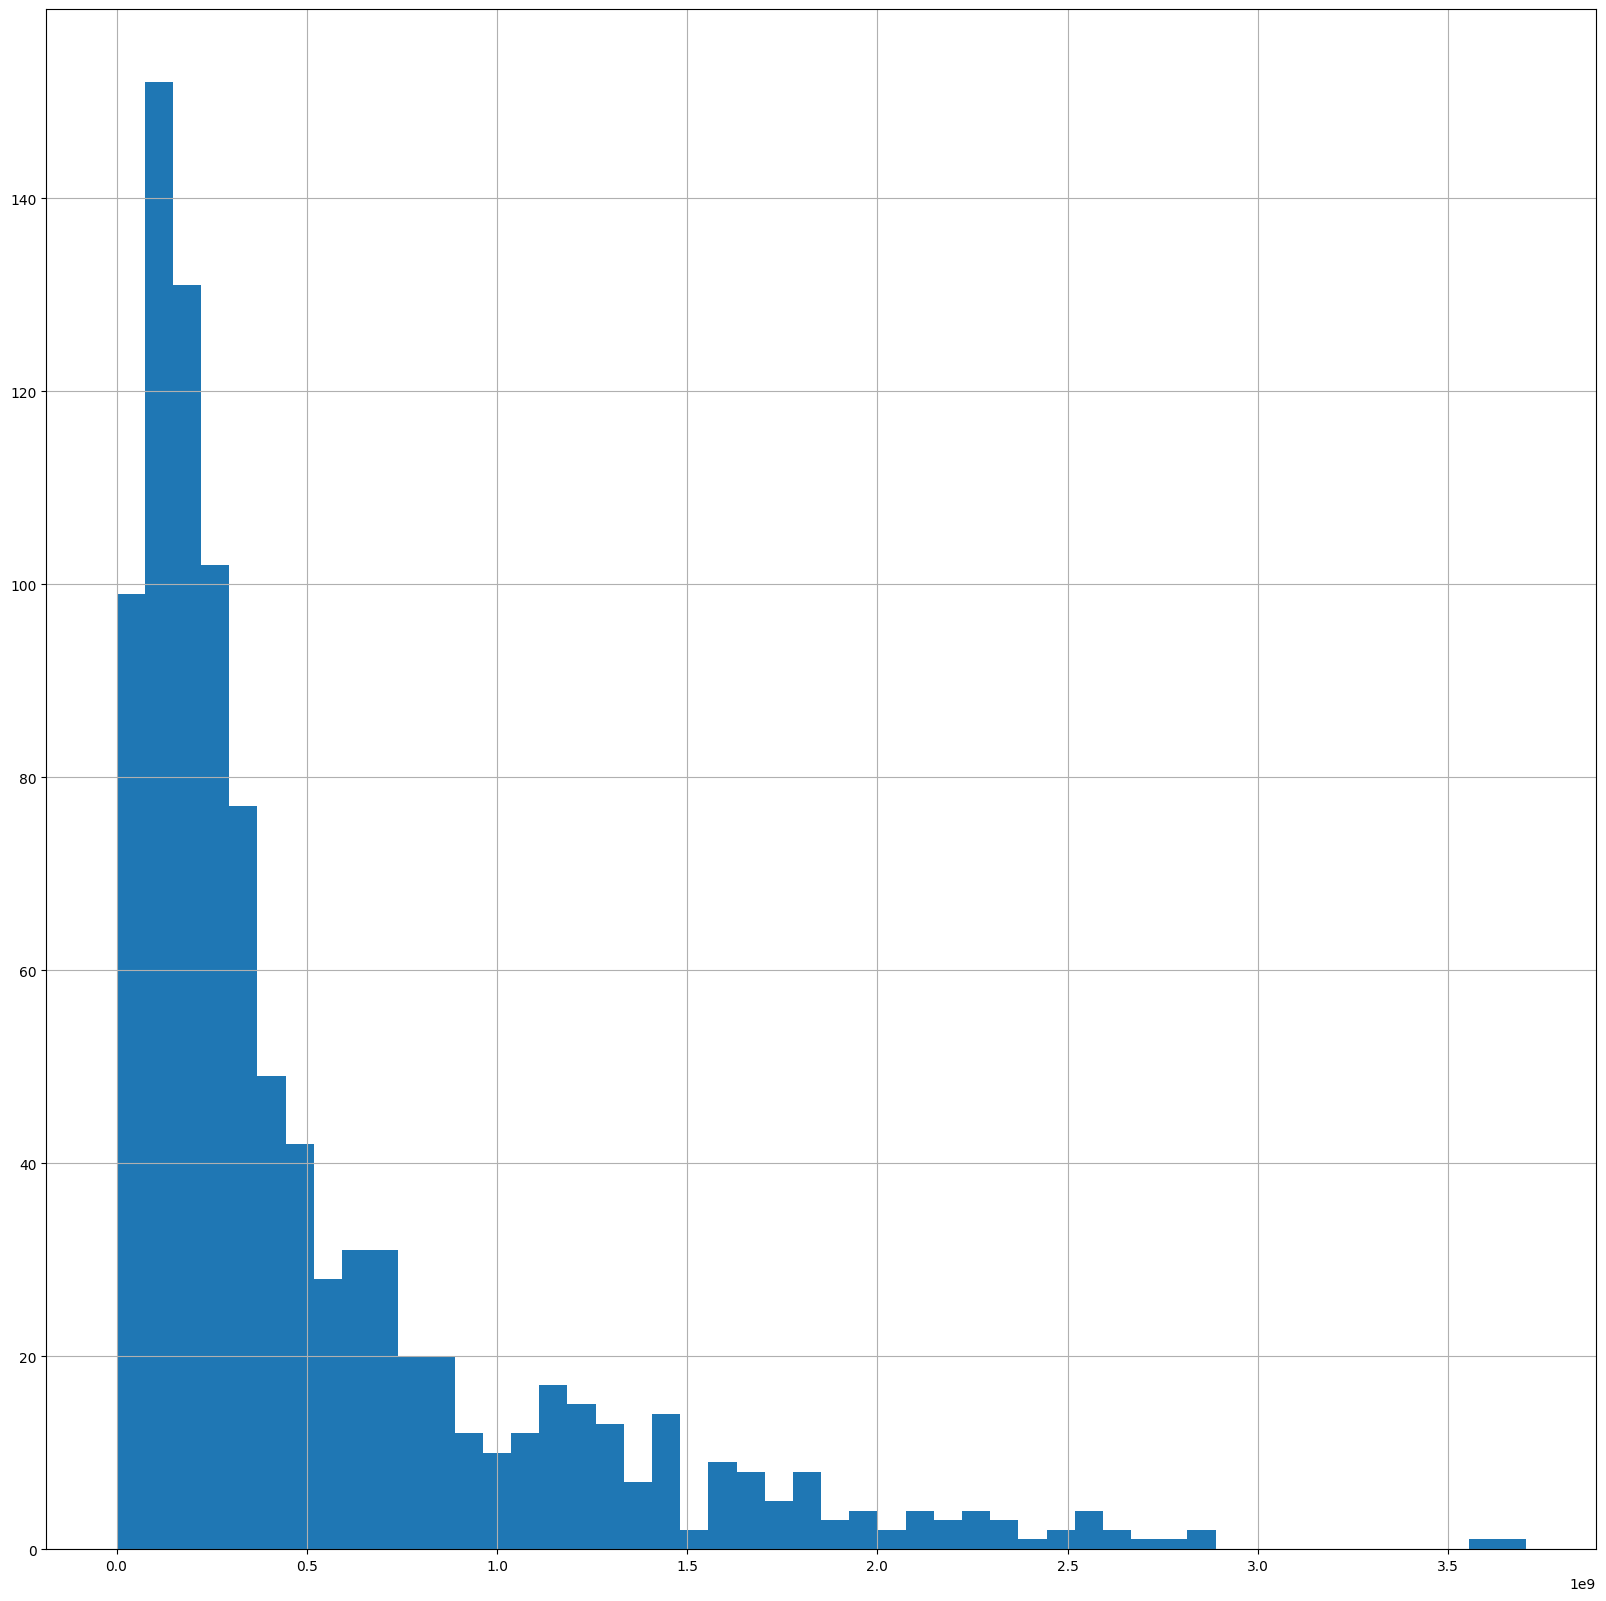

In [103]:
df_spotify['streams'].hist(bins=50, figsize=(20,20))

<Axes: >

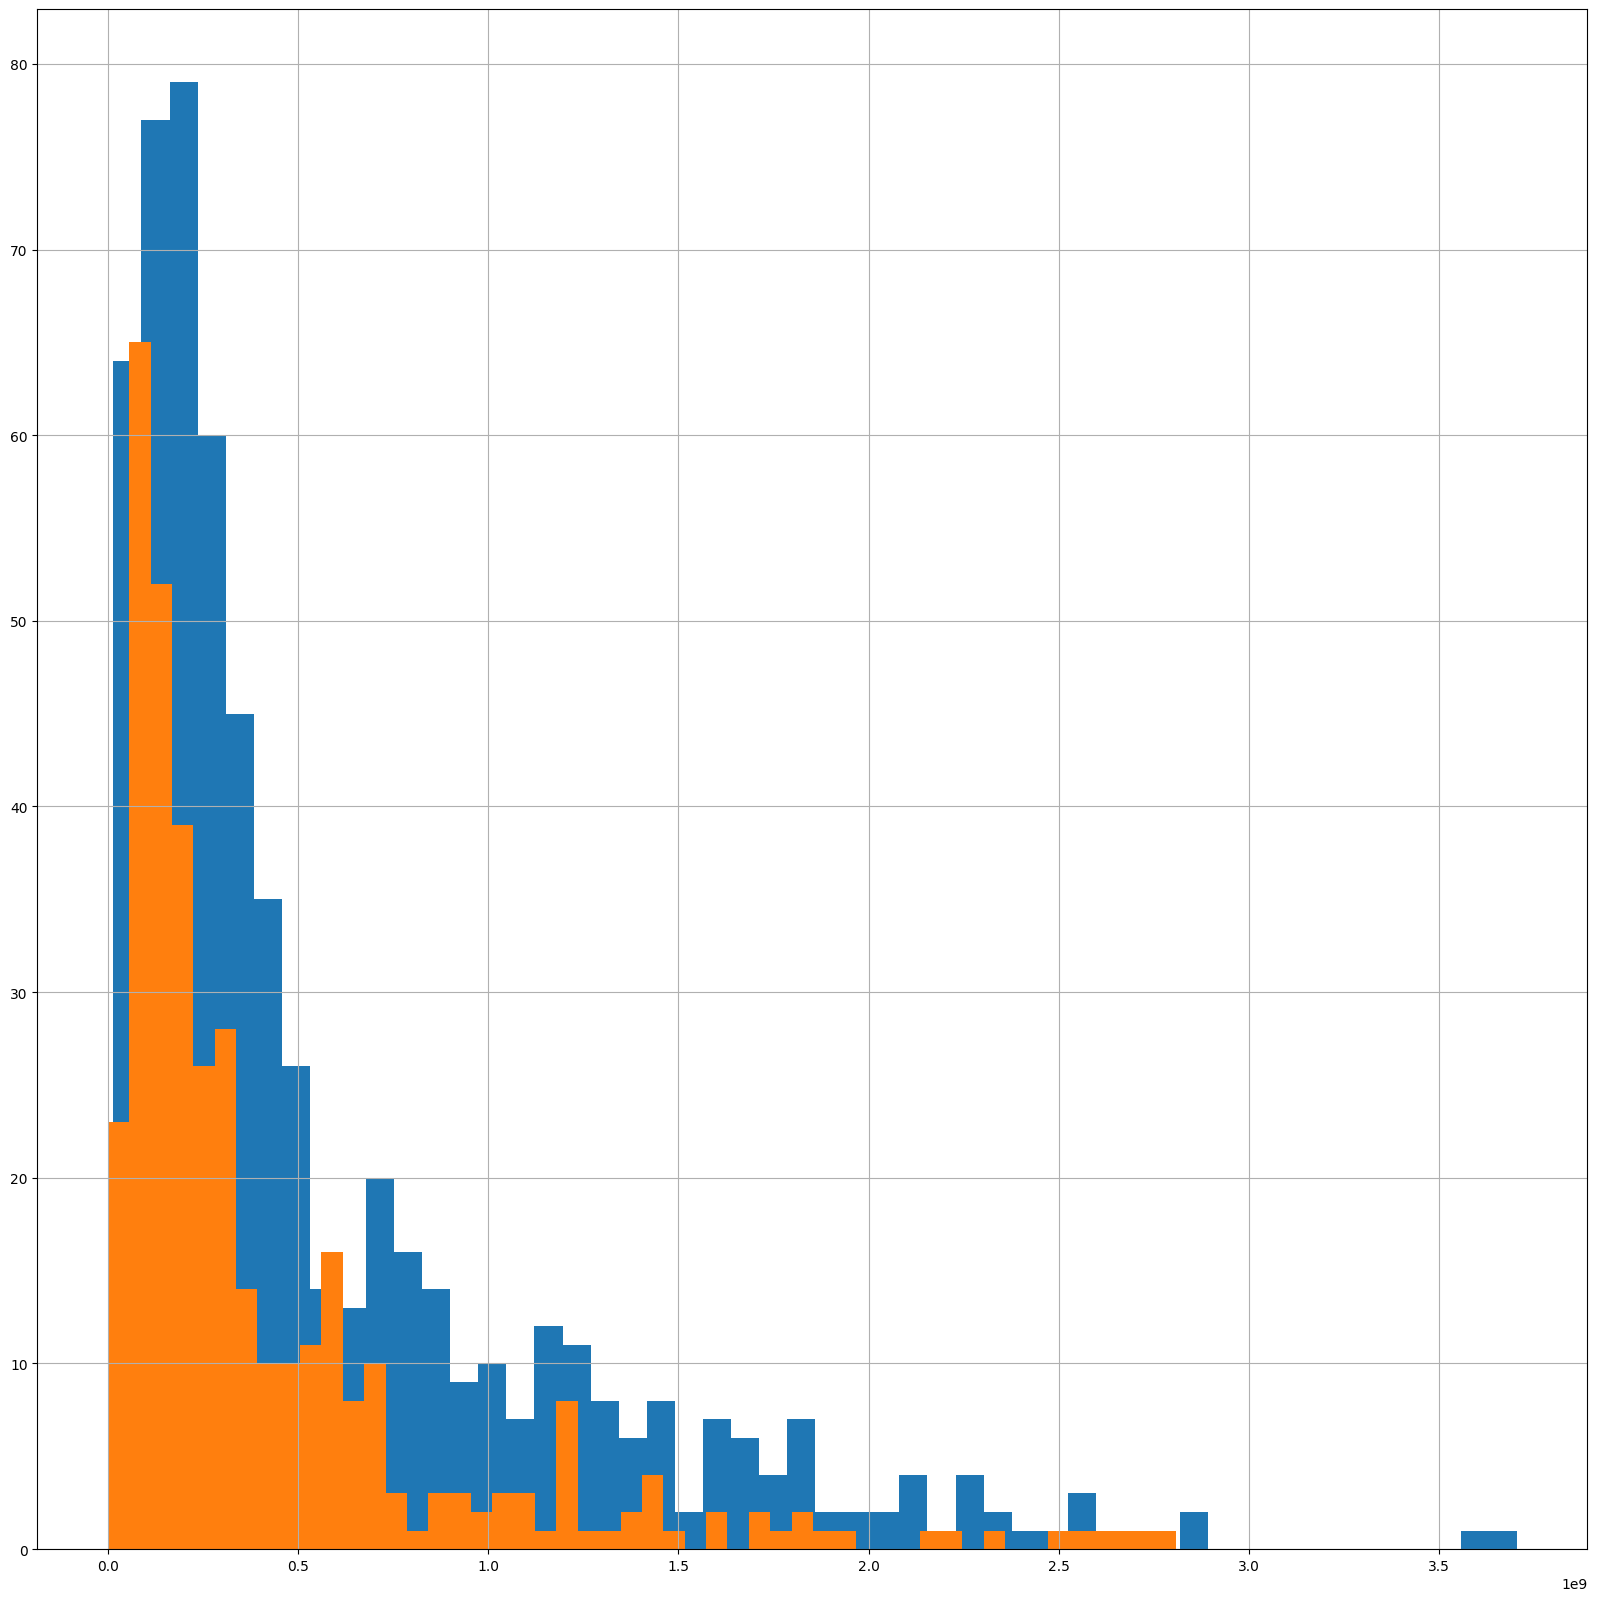

In [106]:
# d) ¿Existe una diferencia signitificativa en las reproducciones entre las canciones de un solo artista y las de más de uno? **(0.5 puntos)**

df_single_artist_streams = df_spotify[df_spotify['artist_count'] == 1]
df_multiple_artist_streams = df_spotify[df_spotify['artist_count'] > 1]

df_single_artist_streams['streams'].hist(bins=50, figsize=(20,20))
df_multiple_artist_streams['streams'].hist(bins=50, figsize=(20,20))

# Podemos observar que de media reciben mas streams aquellas canciones con mas artistas, que las de uno solo. 

### Matriz de Correlaciones

In [119]:
import plotly.express as px

df_dummies = pd.get_dummies(df_spotify, columns=['track_name', 'artist(s)_name' ])
corr_matrix = df_dummies.corr()
fig = px.imshow(corr_matrix)

fig.show() # Pues joder, siento que hayas tenido que ver esta atrocidad de examen, pero que se le va a hacer. 